<a href="https://colab.research.google.com/github/arham202/AvSaad/blob/main/Assignment_Pima_Indian_Diabetes_Dataset(Arham_Alam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment Pima Indian Diabetes Dataset**
The Pima Indian Diabetes Dataset is a widely used dataset in machine learning and statistics for predicting diabetes. The dataset was collected by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) in the 1990s from the Pima Indian community in Arizona, USA. The dataset contains information on 768 individuals. The information includes variables such as age, body mass index (BMI), blood pressure, and blood sugar levels.

The Pima Indian Diabetes Dataset was collected by the National Institute of Diabetes and Digestive and Kidney Diseases to predict the presence of diabetes in patients using diagnostic measurements. The dataset only includes females who are at least 21 years old and of Pima Indian heritage. These constraints were applied while selecting instances from a larger database.

In [1]:
 #@title Changing the Font size
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '18px'
      rule.style.color = 'white'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)

<IPython.core.display.Javascript object>

## **Dataset Source**
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
#Read Pima Indian Diabetes Dataset from kaggle

from google.colab import drive
drive.mount('/content/drive')

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
import pydot
import pydotplus
from IPython.display import Image
from graphviz import Source

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ML datasets/diabetes.csv")
df.head()

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from google.colab import data_table
data_table.DataTable(df)

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
#Show the shape of the dataset
print (f'Diabetes dataframe shape is : {df.shape}');
print(f'Diabetes dataset has {df.shape[0]} rows and {df.shape[1]} columns')

<IPython.core.display.Javascript object>

Diabetes dataframe shape is : (768, 9)
Diabetes dataset has 768 rows and 9 columns


In [7]:
#Show the name of the columns, explain if possible in some detail
print (f'Column Names are : {df.columns.tolist()}')

<IPython.core.display.Javascript object>

Column Names are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [69]:
 #@title Columns Description
table_html = '''
  <style>
    table {
      border-collapse: collapse;
      width: 100%;
    }
    th, td {
      color: black;
      text-align: left;
      padding: 8px;
    }
    th {
      background-color: #5267EC;
      color: black;
    }
    tr:nth-child(even) {
      background-color: #5267EC;
    }
  </style>
<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Pregnancies</td>
      <td>Number of times pregnant</td>
    </tr>
    <tr>
      <td>Glucose</td>
      <td>Plasma glucose concentration in 2 hours in an oral glucose tolerance test</td>
    </tr>
    <tr>
      <td>Blood Pressure</td>
      <td>Diastolic blood pressure (mm Hg)</td>
    </tr>
    <tr>
      <td>Skin Thickness</td>
      <td>Triceps skin fold thickness (mm)</td>
    </tr>
    <tr>
      <td>Insulin</td>
      <td>2-Hour serum insulin (mu U/ml)</td>
    </tr>
    <tr>
      <td>BMI</td>
      <td>Body mass index (weight in kg/(height in m)^2)</td>
    </tr>
    <tr>
      <td>Diabetes Pedigree Function</td>
      <td>Diabetes pedigree function, which represents the likelihood of diabetes based on family history</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>Age in years</td>
    </tr>
    <tr>
      <td>Outcome</td>
      <td>Class variable (0 or 1) 268 of 768 are 1, the others are 0</td>
    </tr>
  </tbody>
</table>
'''
# display the HTML table
from IPython.display import HTML
HTML(table_html)


<IPython.core.display.Javascript object>

Column Name,Description
Pregnancies,Number of times pregnant
Glucose,Plasma glucose concentration in 2 hours in an oral glucose tolerance test
Blood Pressure,Diastolic blood pressure (mm Hg)
Skin Thickness,Triceps skin fold thickness (mm)
Insulin,2-Hour serum insulin (mu U/ml)
BMI,Body mass index (weight in kg/(height in m)^2)
Diabetes Pedigree Function,"Diabetes pedigree function, which represents the likelihood of diabetes based on family history"
Age,Age in years
Outcome,"Class variable (0 or 1) 268 of 768 are 1, the others are 0"


In [9]:
#Display dataframe in a useful column order for decision makers

df = df.loc[:, ['Outcome','Age','Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',]]

data_table.DataTable(df)

<IPython.core.display.Javascript object>

,Outcome,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,1,50,6,148,72,35,0,33.6,0.627
1,0,31,1,85,66,29,0,26.6,0.351
2,1,32,8,183,64,0,0,23.3,0.672
3,0,21,1,89,66,23,94,28.1,0.167
4,1,33,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...,...,...
763,0,63,10,101,76,48,180,32.9,0.171
764,0,27,2,122,70,27,0,36.8,0.340
765,0,30,5,121,72,23,112,26.2,0.245
766,1,47,1,126,60,0,0,30.1,0.349


In [10]:
#Perform a basic summary of dataset features and target columns.
df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   Age                       768 non-null    int64  
 2   Pregnancies               768 non-null    int64  
 3   Glucose                   768 non-null    int64  
 4   BloodPressure             768 non-null    int64  
 5   SkinThickness             768 non-null    int64  
 6   Insulin                   768 non-null    int64  
 7   BMI                       768 non-null    float64
 8   DiabetesPedigreeFunction  768 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe().round(2)

<IPython.core.display.Javascript object>

,Outcome,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.35,33.24,3.85,120.89,69.11,20.54,79.80,31.99,0.47
std,0.48,11.76,3.37,31.97,19.36,15.95,115.24,7.88,0.33
min,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08
25%,0.00,24.00,1.00,99.00,62.00,0.00,0.00,27.30,0.24
50%,0.00,29.00,3.00,117.00,72.00,23.00,30.50,32.00,0.37
75%,1.00,41.00,6.00,140.25,80.00,32.00,127.25,36.60,0.63
max,1.00,81.00,17.00,199.00,122.00,99.00,846.00,67.10,2.42


In [12]:
# Unique values in the Outcome column
df['Outcome'].unique()

<IPython.core.display.Javascript object>

array([1, 0])

In [13]:
#Count of unique values in the Outcome column
df['Outcome'].value_counts()

<IPython.core.display.Javascript object>

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
# Dropping a few records which are having 0 values.

df = df[df['Insulin']!=0]
df = df[df['BloodPressure']!=0]
df = df[df['SkinThickness']!=0]
df = df[df['BMI']!=0]
df = df[df['Glucose']!=0]

<IPython.core.display.Javascript object>

In [15]:
print(f'Updated Diabetes dataset has {df.shape[0]} rows and {df.shape[1]} columns')

<IPython.core.display.Javascript object>

Updated Diabetes dataset has 392 rows and 9 columns


In [16]:
df.describe().round(2)

<IPython.core.display.Javascript object>

,Outcome,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,0.33,30.86,3.30,122.63,70.66,29.15,156.06,33.09,0.52
std,0.47,10.20,3.21,30.86,12.50,10.52,118.84,7.03,0.35
min,0.00,21.00,0.00,56.00,24.00,7.00,14.00,18.20,0.08
25%,0.00,23.00,1.00,99.00,62.00,21.00,76.75,28.40,0.27
50%,0.00,27.00,2.00,119.00,70.00,29.00,125.50,33.20,0.45
75%,1.00,36.00,5.00,143.00,78.00,37.00,190.00,37.10,0.69
max,1.00,81.00,17.00,198.00,110.00,63.00,846.00,67.10,2.42


<IPython.core.display.Javascript object>

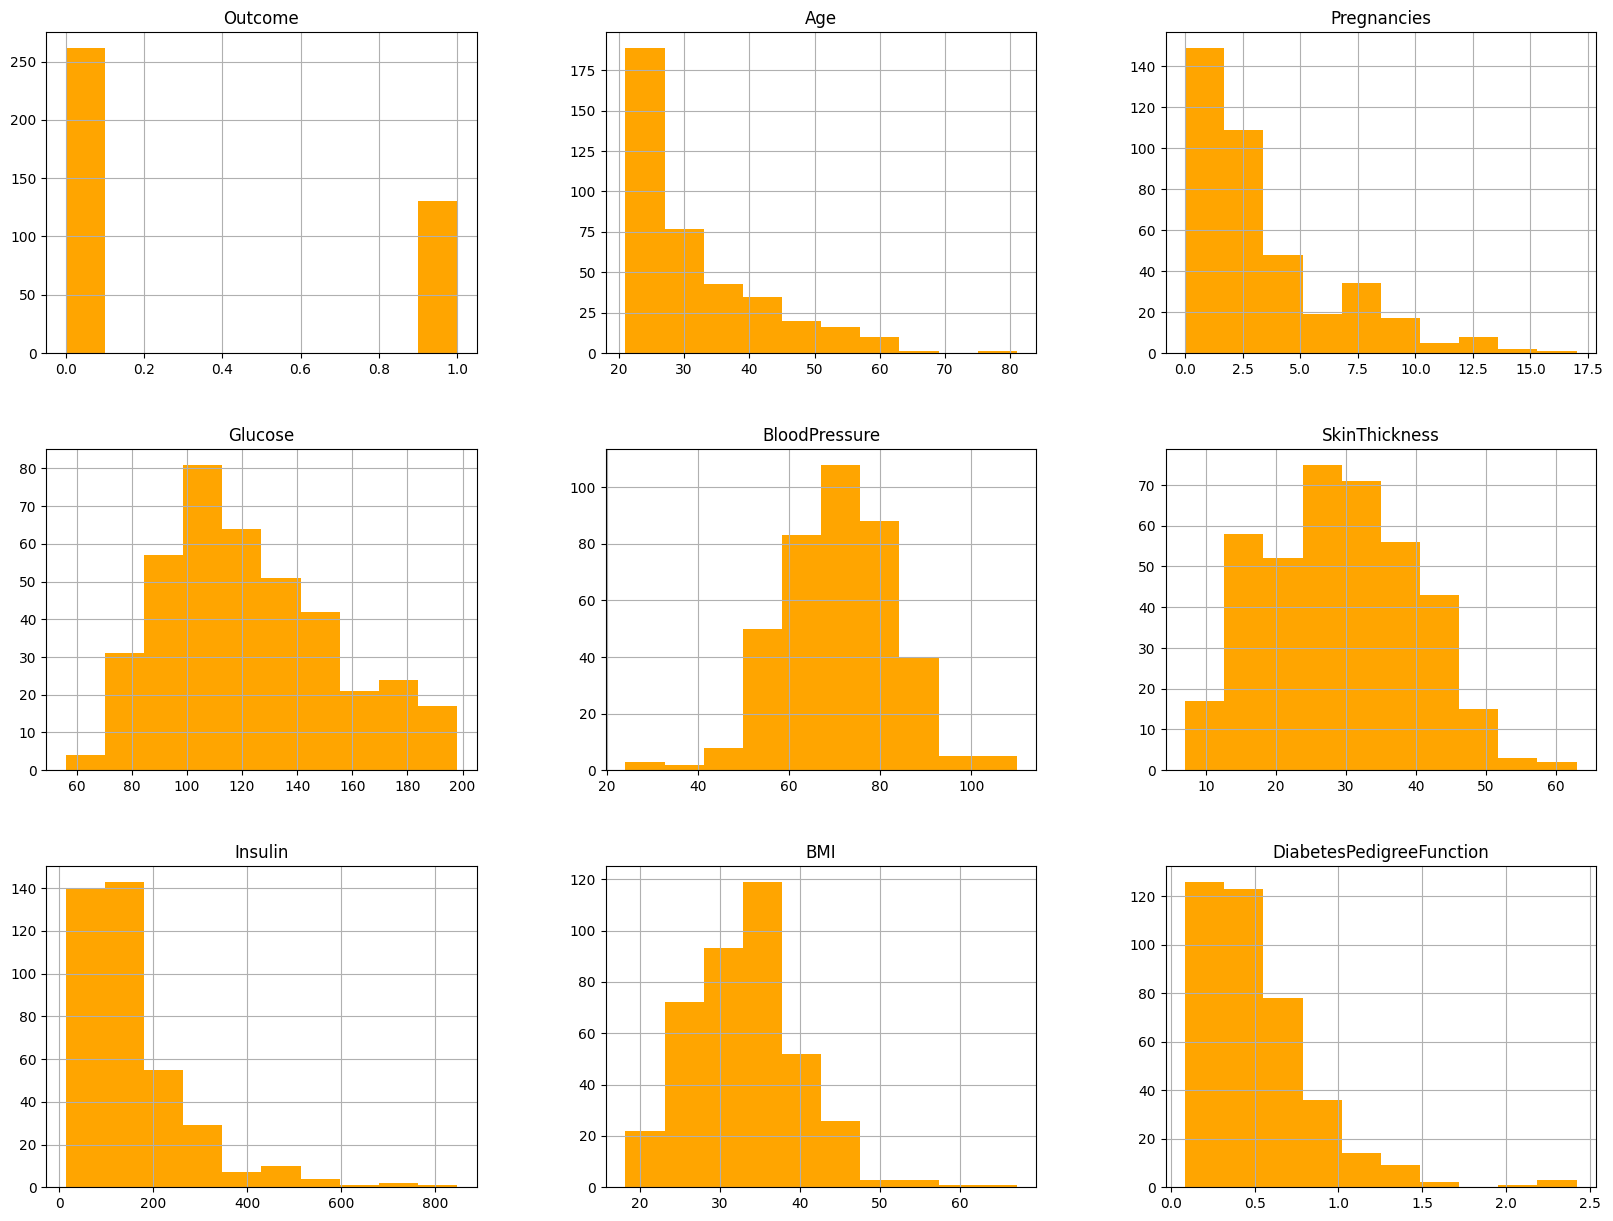

In [17]:
#Plot histograms, show the mean line on histogram plot
plt.close()
plt.rcParams['figure.figsize'] = [20, 15]
df.hist(color='orange')
plt.show()

<IPython.core.display.Javascript object>

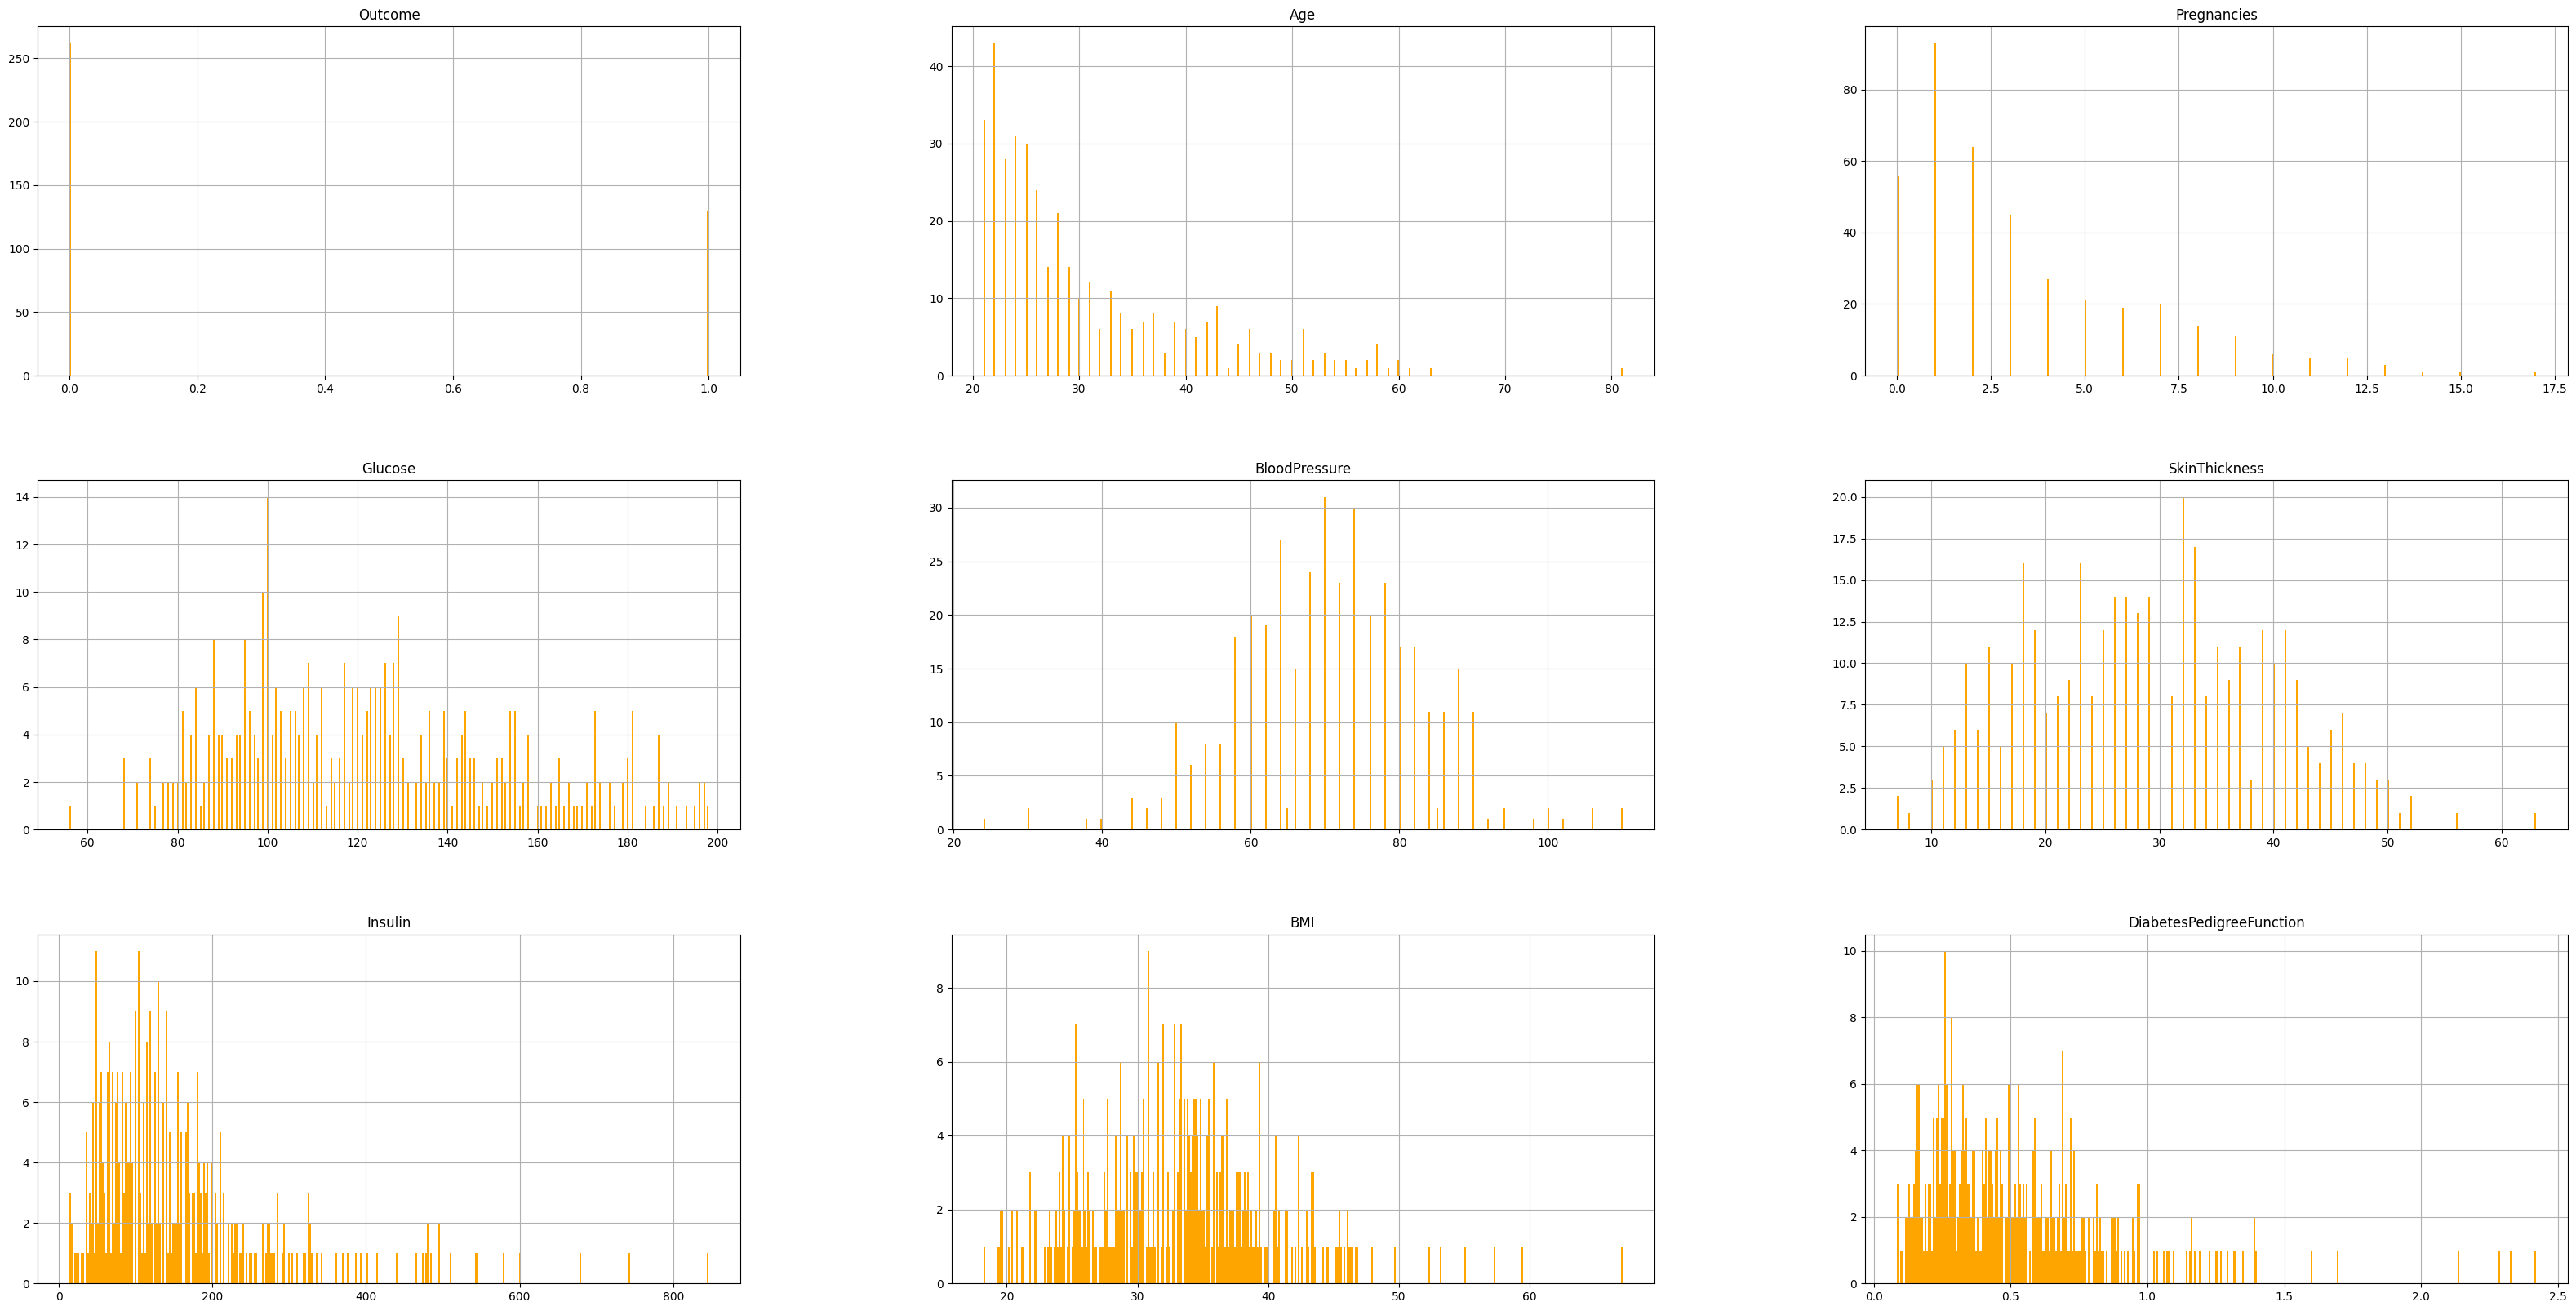

In [18]:
plt.rcParams['figure.figsize'] = [40, 20]
df.iloc[:,: ].hist(bins=df.shape[0] ,color='orange');

<IPython.core.display.Javascript object>

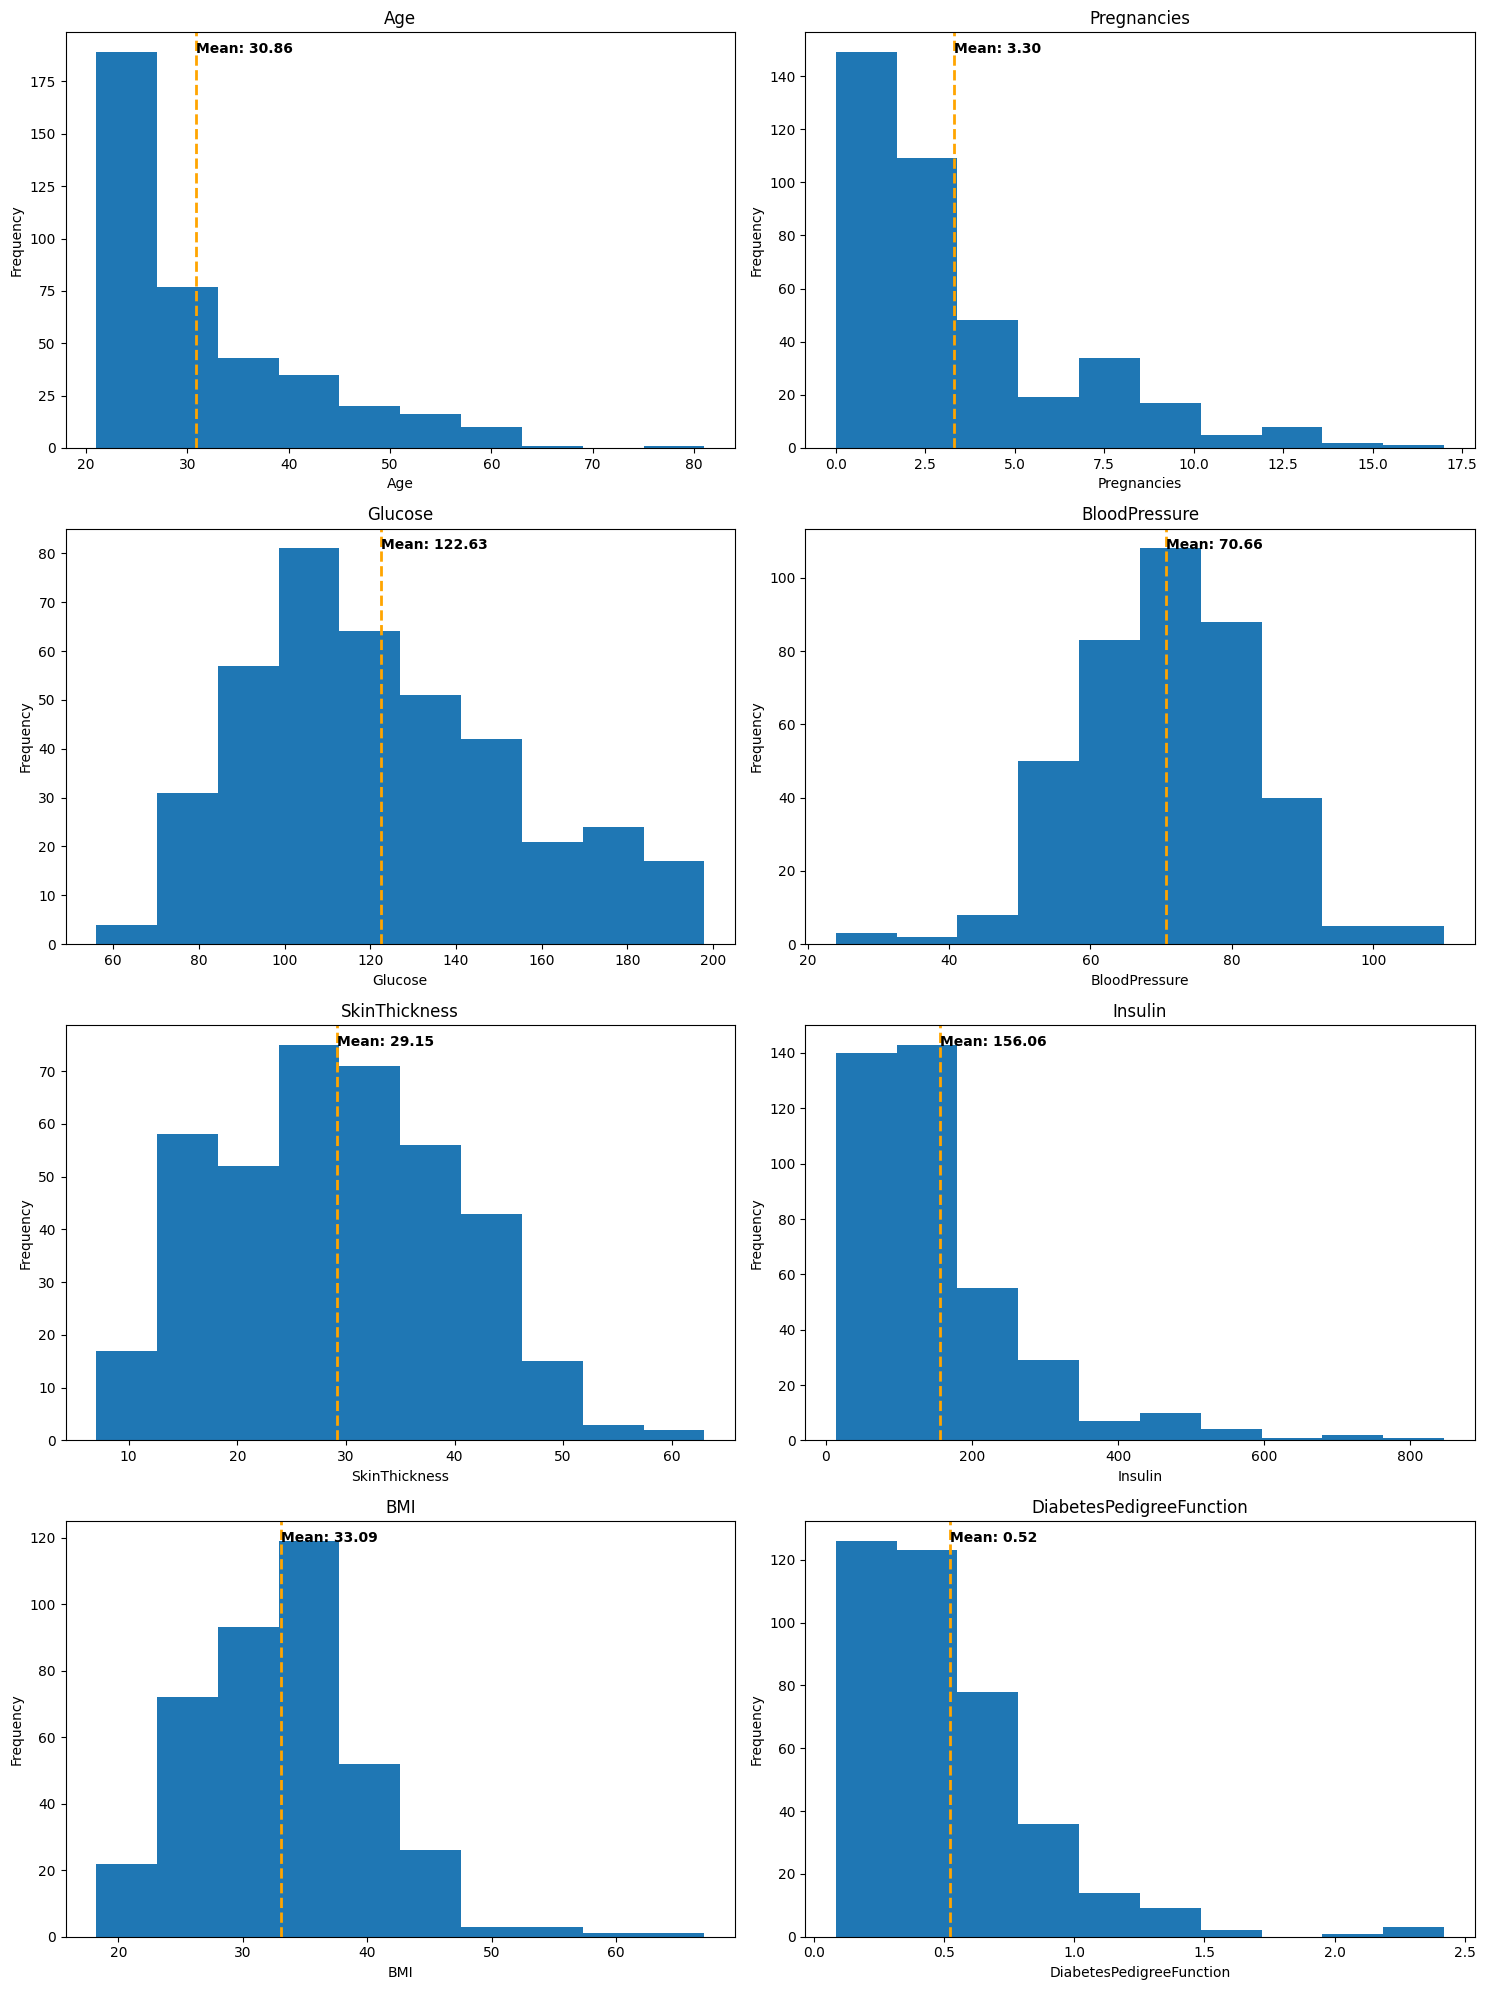

In [19]:
col_Names = ['Age','Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',]

plt.rcParams['figure.figsize'] = [15, 20]
num_plots = len(col_Names)
num_cols = 2
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols)

for i, ax in enumerate(axes.flat):
    if i < num_plots:
        ax.hist(df[col_Names[i]])
        ax.axvline(df[col_Names[i]].mean(), color='orange', linestyle='dashed', linewidth=2)
        ax.set_xlabel(col_Names[i]);
        ax.set_ylabel('Frequency')
        ax.set_title(col_Names[i])
        ax.text(df[col_Names[i]].mean(), ax.get_ylim()[1] * 0.95, 
                f"Mean: {df[col_Names[i]].mean():.2f}", fontsize=10, weight='bold')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [20]:
#Examine hist each for skew visually, and using scipy lib
skew = df.skew() 
print("Skew in the data:\n") 
print(skew)

<IPython.core.display.Javascript object>

Skew in the data:

Outcome                     0.717990
Age                         1.403607
Pregnancies                 1.335596
Glucose                     0.517850
BloodPressure              -0.087516
SkinThickness               0.209311
Insulin                     2.165116
BMI                         0.663485
DiabetesPedigreeFunction    1.959101
dtype: float64


<IPython.core.display.Javascript object>

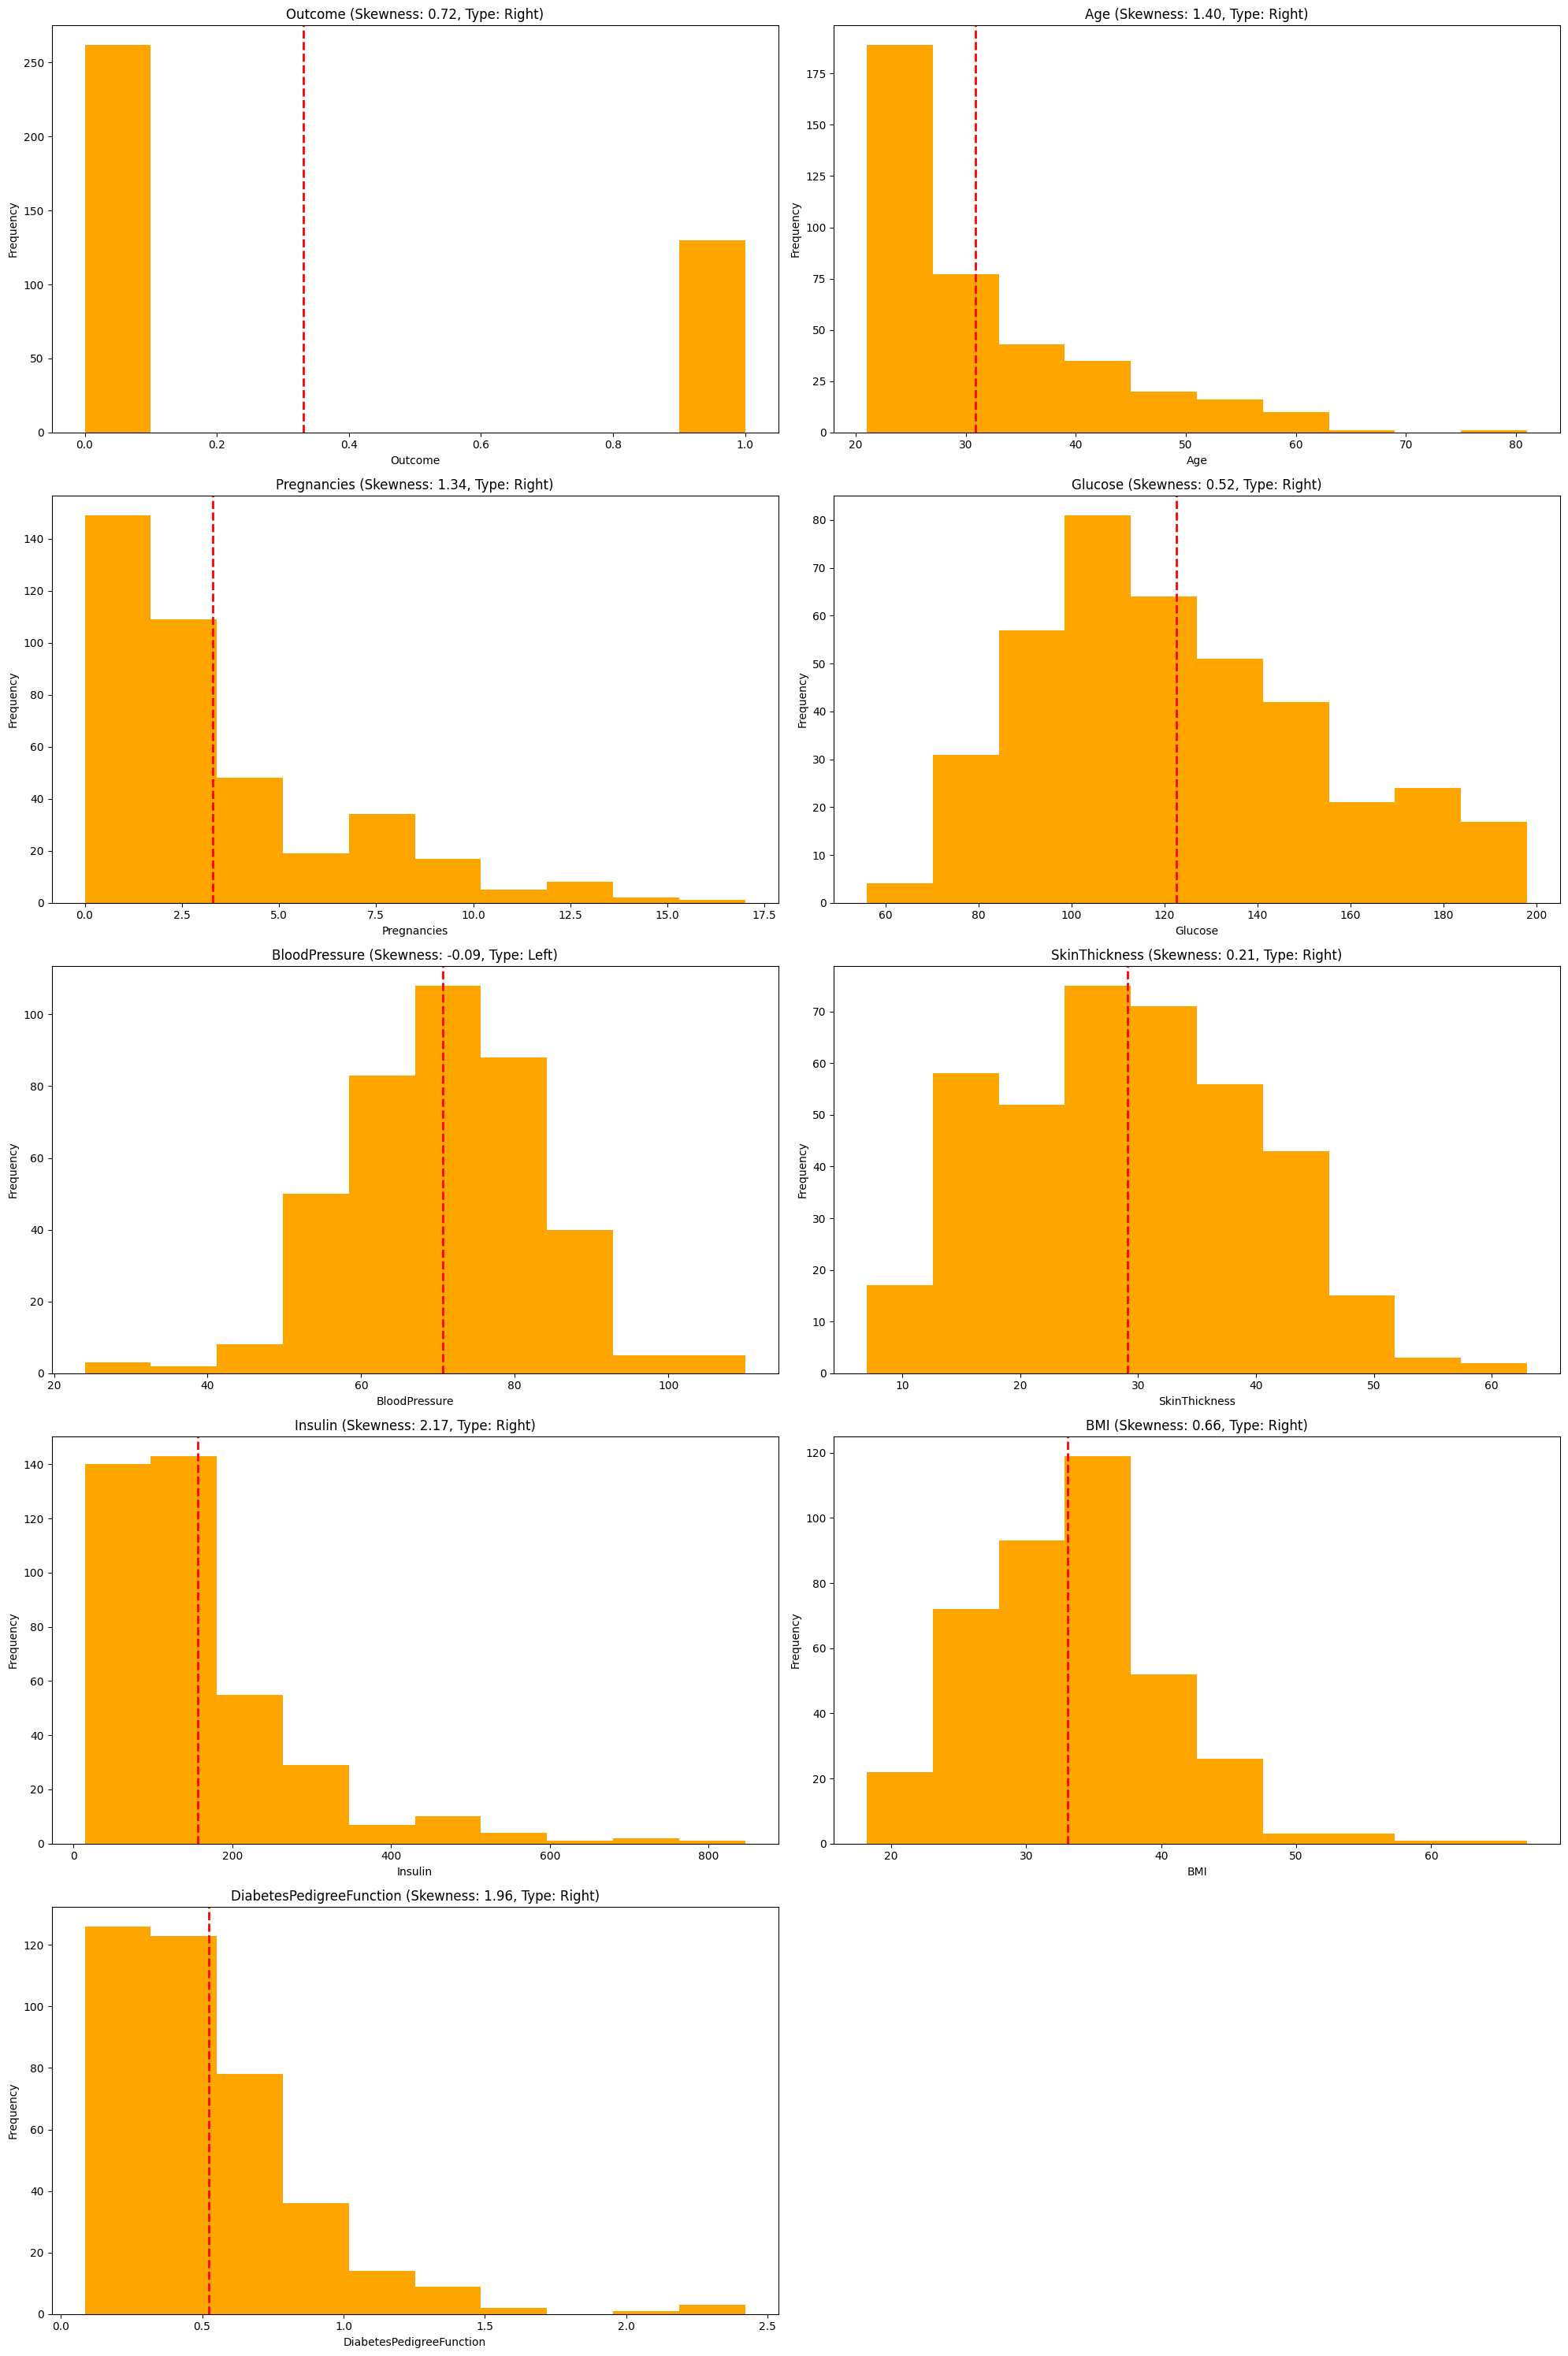

In [21]:
# Publish those hist with skew either in title or as text in the plot.
# Bring out three patterns or inferences that you observed visually
# and backed by skewness statistics

import math

skew = df.skew() 
n_rows = math.ceil(len(df.columns) / 2)
plt.figure(figsize=(20, 30))
gs = plt.GridSpec(n_rows, 2)


for i, skew in zip(df.columns.tolist(), skew):
    row = (df.columns.tolist().index(i)) // 2
    col = (df.columns.tolist().index(i)) % 2
    
    ax = plt.subplot(gs[row, col])
    ax.axvline(df[i].mean(), color='red', linestyle='dashed', linewidth=2)
    ax.hist(df[i],color="orange")
    ax.set_xlabel(i);
    ax.set_ylabel('Frequency')
    ax.set_title(f'{i} (Skewness: {skew:.2f}, Type: {"Left" if skew < 0 else "Right" if skew > 0 else "none"})')

plt.tight_layout()
plt.show()

---
###From the histograms and skewness statistics, we can make three patterns or inferences about the Pima Indian Diabetes dataset.
---

1. Visually, data is right skewed. For data of count of pregenancies. A large proportion of the participants are zero count on pregnancy. As the data set includes women > 21 yrs, its likely that many are unmarried.

2. "Glucose" displays a somewhat right-skewed distribution, suggesting that a greater number of participants have higher glucose levels. The histogram of this feature further confirms this observation as it displays a sharp peak in the 100-150 range, while the right tail of the histogram indicates that a small number of participants have significantly higher glucose levels.

3. "BMI" exhibits a positively skewed distribution, which implies that a greater proportion of participants have higher BMI values. This trend is further substantiated by the histogram, which displays a sharp peak in the 30-40 range, accompanied by a long right tail, indicating that some participants have substantially higher BMI values


In [62]:
#Use scikit learn to split train test datasets
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#20% of the data is used for testing, while the remaining 80% is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (f' Training data shape {X_train.shape}')
print (f' Testing data shape {X_test.shape}')

<IPython.core.display.Javascript object>

 Training data shape (313, 8)
 Testing data shape (79, 8)


In [63]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                            random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                            class_weight=None, ccp_alpha=0.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

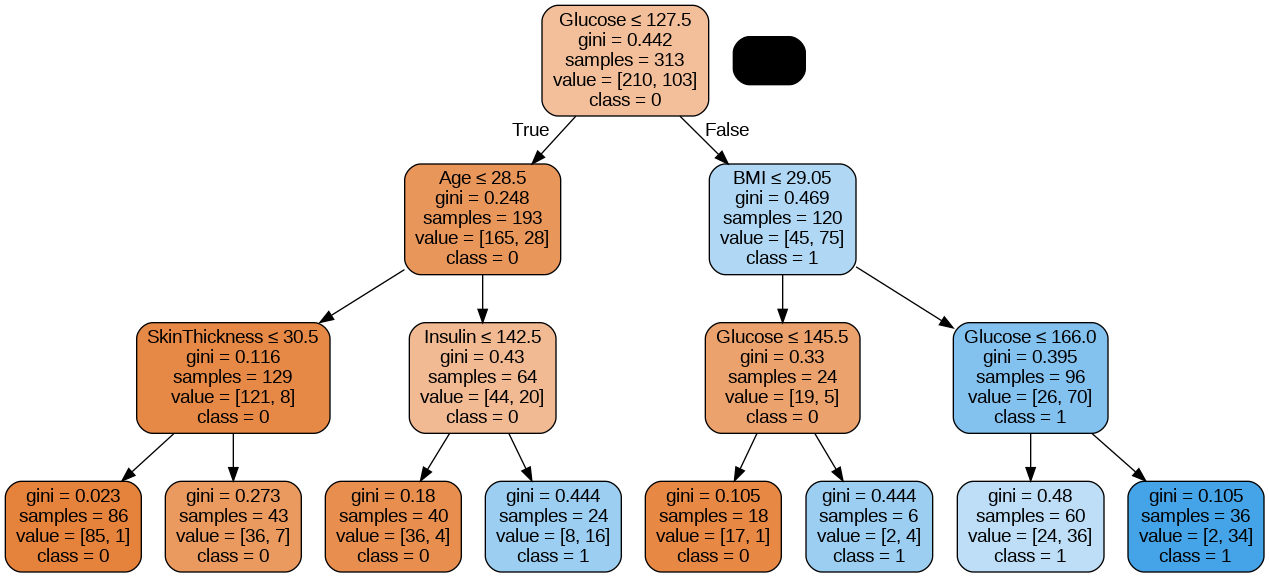

In [64]:
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:', accuracy)

<IPython.core.display.Javascript object>

Accuracy: 0.7468354430379747


In [66]:
clf2 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=4, min_samples_split=2,
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
                            random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                            class_weight=None, ccp_alpha=0.0)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

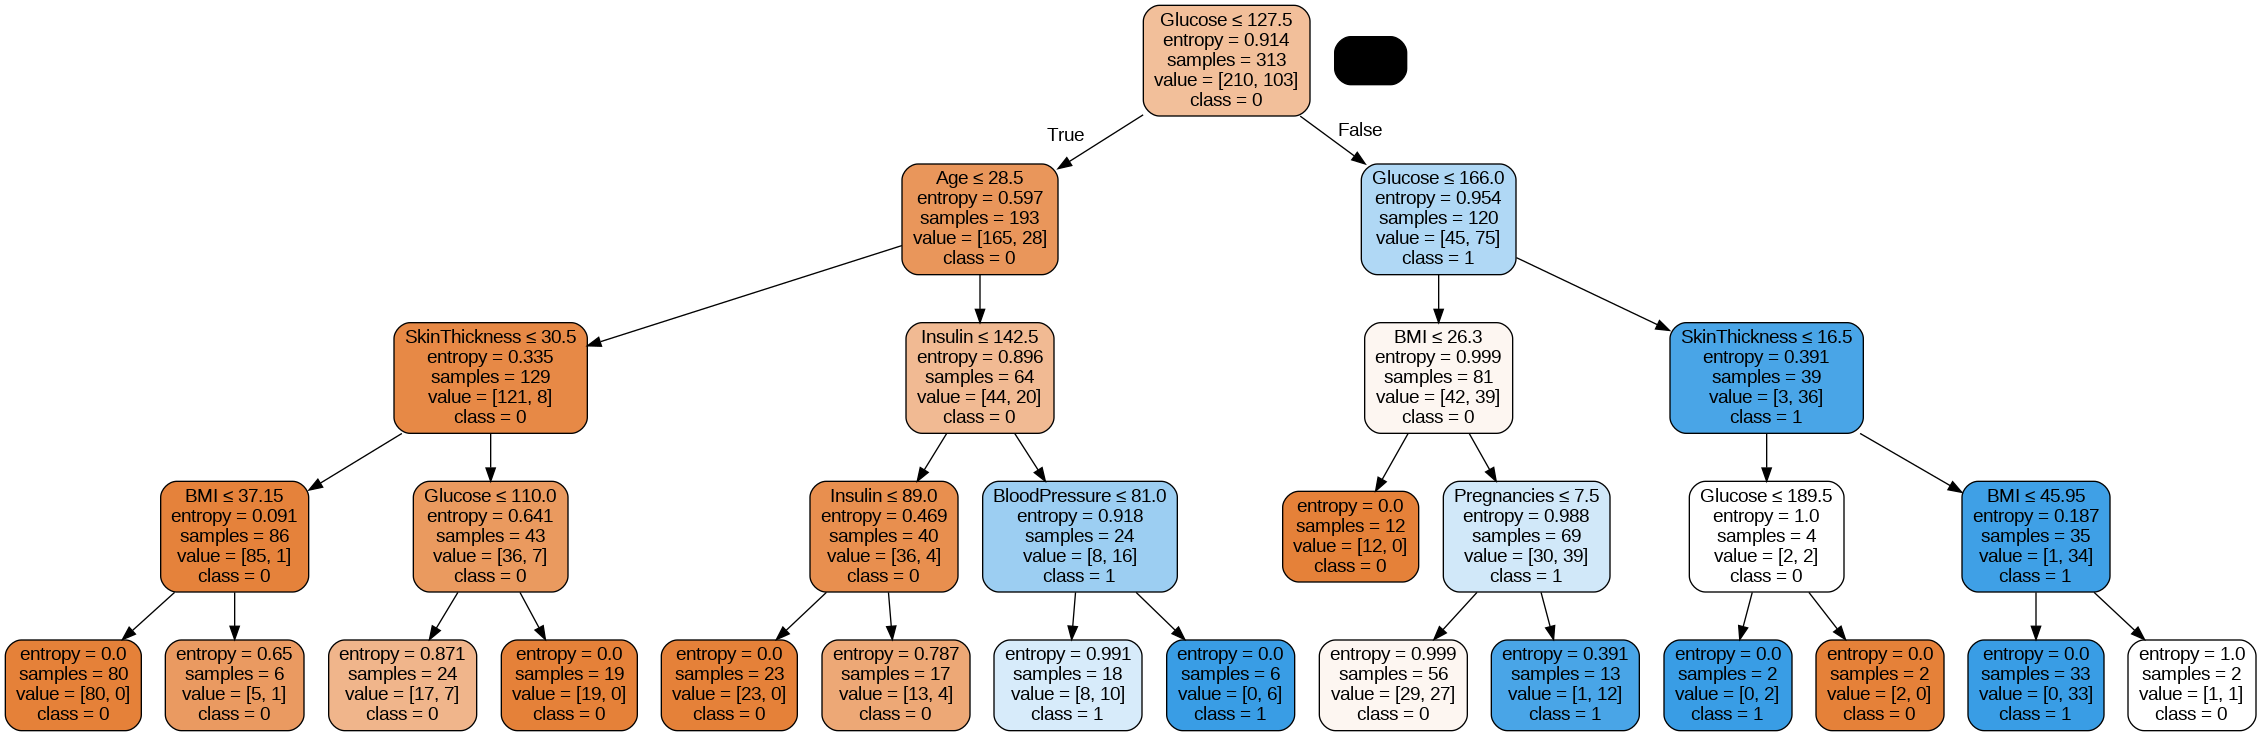

In [67]:
dot_data = export_graphviz(clf2, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [68]:
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy:', accuracy)

<IPython.core.display.Javascript object>

Accuracy: 0.7088607594936709


<h2>How can you generate another model and what is its impact on tree structure and accuracy ?</h2>

To generate another decision tree model, we can adjust hyperparameters like maximum depth, criterion, and minimum number of samples required to split a node.To adjust hyperparameters, we can create an instance of the decision tree classifier with the desired hyperparameters and then fit it to the training data.We can also change the criterion in the decision tree.A criterion is a measure or a rule that is used to make decisions about how to split the data at each node of the tree